<a href="https://colab.research.google.com/github/mohebmaher/MSC-Stuff/blob/main/end_to_end_classifier_with_pure_low_level_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
# Check the current tf version:
tf.__version__

'2.8.2'

In [3]:
# Set a random seed:
rng = np.random.default_rng(42)

In [4]:
# Generate two classes of random points in a 2D plane:
m = 2000

negative_samples = rng.multivariate_normal(mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=m//2)
positive_samples = rng.multivariate_normal(mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=m//2)
X = np.vstack((negative_samples, positive_samples)).astype(np.float32)

positive_class, negative_class = np.zeros((m//2, 1)), np.ones((m//2, 1))
y = np.vstack((positive_class, negative_class)).astype(np.float32)

In [5]:
# Check the data shape:
X.shape, y.shape

((2000, 2), (2000, 1))

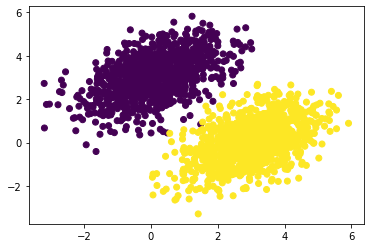

In [6]:
# Plot the data:
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0]);

In [7]:
# Define the model function:
def classify(X, w, b):
    z = tf.matmul(X, w) + b
    preds = tf.nn.sigmoid(z)
    return preds

In [8]:
# Define the cost function:
def compute_cost(preds, y):
    loss_per_sample = - (y * tf.math.log(preds)) - ((1-y) * (tf.math.log(1-preds)))
    total_cost = tf.math.reduce_mean(loss_per_sample)
    return total_cost

In [9]:
# Define the GD algorithm:
def gradient_descent(X, y, model, cost_func, w_in=None, b_in=None, epochs=1000, alpha=0.1):
    
    # Determine the input dims:
    m,n = X.shape
    
    # Initialize w & b:
    if not w_in:
        w_in = tf.Variable(tf.ones((n, 1)))
    if not b_in:
        b_in = tf.Variable(tf.zeros((1, 1)))
        
    # Iterate over the data:
    costs = np.zeros(epochs)
    w, b = w_in, b_in
    for i in range(epochs):
        with tf.GradientTape() as tape:
            preds = model(X, w, b)
            cost = cost_func(preds, y)
        grad_cost_wrt_w, grad_cost_wrt_b = tape.gradient(cost, [w, b])
        w.assign_sub(alpha * grad_cost_wrt_w)
        b.assign_sub(alpha * grad_cost_wrt_b)
        costs[i] = cost
        if (i % 50 == 0):
            print(f"Cost at step {i}: {costs[i]:.4f}")
        
    # Plot the epochs Vs. Costs:
    print('\nEpochs Vs. Costs:\n')
    sns.lineplot(x=np.arange(1, epochs+1), y=costs);
    
    # Return costs, w & b:
    return costs, w, b

Cost at step 0: 1.7006
Cost at step 50: 0.0724
Cost at step 100: 0.0464
Cost at step 150: 0.0360
Cost at step 200: 0.0302
Cost at step 250: 0.0265
Cost at step 300: 0.0239
Cost at step 350: 0.0219
Cost at step 400: 0.0204
Cost at step 450: 0.0191
Cost at step 500: 0.0181
Cost at step 550: 0.0173
Cost at step 600: 0.0165
Cost at step 650: 0.0159
Cost at step 700: 0.0153
Cost at step 750: 0.0148
Cost at step 800: 0.0144
Cost at step 850: 0.0140
Cost at step 900: 0.0136
Cost at step 950: 0.0133

Epochs Vs. Costs:



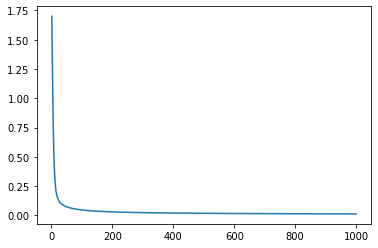

In [10]:
# Run the GD algorithm:
costs, w, b = gradient_descent(X, y, model=classify, cost_func=compute_cost)